# 7. Métricas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Etiquetas de Ejemplo

Clasificación binaria **probabilística**:

In [2]:
# Etiquetas
y_true = np.array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])
# Probabilidades
y_pred_proba = np.array([.99, .98, .72, .70, .65, .51, .39, .24, .11, .01])

Clasificación binaria **determinista**:

In [3]:
# Umbral
threshold = 0.5

# Decisión de Predicción
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Clasificación **multiclase** determinista:

In [4]:
y_true_MC = ['cat', 'ant', 'cat', 'cat', 'ant', 'bird']
y_pred_MC = ['ant', 'ant', 'cat', 'cat', 'ant', 'cat']

## Precision, Recall, y F1

La **precision** es la proporción de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{|Train \cap Test|}{|Train|} = \frac{TP}{TP + FP}$$

La **recall** es la proporción de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{|Train \cap Test|}{|Test|} = \frac{TP}{TP + FN}$$

El **F1** es la media armónica de la *precision* y la *recall*.

$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$

Para clasificación **multiclase**, se puede calcular una métrica por clase.
Luego, las métricas se pueden promediar para obtener resultados *macro*.
Para obtener resultados *micro*, se hacen primero cálculos globales para `TP`, `FP`, `TN`, `FN`, y luego se calcula como un problema binario.

Podemos usar *sklearn* para calcularlas:

In [5]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [6]:
from sklearn.metrics import precision_score

# Precision:
# 4 / 6 (con threshold = 0.5), 2 / 2 (con threshold = 0.8)
precision_score(y_true, y_pred)

0.6666666666666666

In [7]:
from sklearn.metrics import recall_score

# Recall
# 4 / 5 (con threshold = 0.5), 2 / 5 (con threshold = 0.8)
recall_score(y_true, y_pred)

0.8

In [8]:
from sklearn.metrics import f1_score

# F1 score
f1_score(y_true, y_pred)

0.7272727272727272

## Reporte de Clasificación

- [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

En clasificación **binaria**:

In [9]:
y_true, y_pred

(array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0]), array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0]))

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



En clasificación **multiclase**:

In [11]:
y_true_MC, y_pred_MC

(['cat', 'ant', 'cat', 'cat', 'ant', 'bird'],
 ['ant', 'ant', 'cat', 'cat', 'ant', 'cat'])

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_true_MC, y_pred_MC, zero_division=0))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



## Matrices de Confusión

- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

En clasificación **binaria**:

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
# Matriz de Confusión
# 0:0 TN | 0:1 FP | 1:0 FN | 1:1 TP
confusion_matrix(y_true, y_pred)

array([[3, 2],
       [1, 4]])

In [15]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

En clasificación **multiclase**:

In [16]:
cm = confusion_matrix(y_true_MC, y_pred_MC, labels=['ant', 'bird', 'cat'])

cm

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

Podemos usar [plot_confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) pero requiere el clasificador.
Definimos nuestra propia versión:

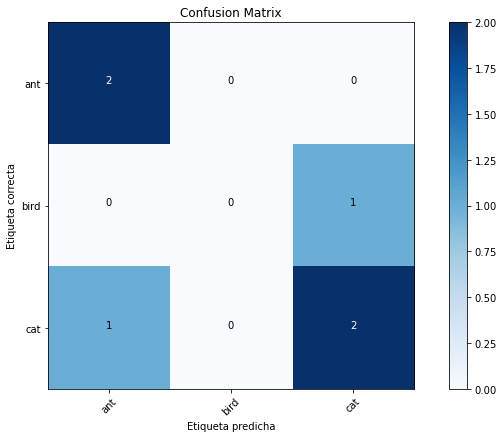

In [17]:
from utils import plot_confusion_matrix

fig = plt.figure(figsize=(10, 6))

plot_confusion_matrix(cm, ['ant', 'bird', 'cat'])

## Curvas ROC

Usamos [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) para obtener los puntos y graficamos:

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_true, y_pred_proba, drop_intermediate=True)

for f, t, th in zip(fpr, tpr, threshold):
    print(f'FPR {f}, TPR {t}, Thr {th}, TNR {1 - f}')

FPR 0.0, TPR 0.0, Thr 1.99, TNR 1.0
FPR 0.0, TPR 0.2, Thr 0.99, TNR 1.0
FPR 0.0, TPR 0.4, Thr 0.98, TNR 1.0
FPR 0.2, TPR 0.4, Thr 0.72, TNR 0.8
FPR 0.2, TPR 0.8, Thr 0.65, TNR 0.8
FPR 0.6, TPR 0.8, Thr 0.39, TNR 0.4
FPR 0.6, TPR 1.0, Thr 0.24, TNR 0.4
FPR 1.0, TPR 1.0, Thr 0.01, TNR 0.0


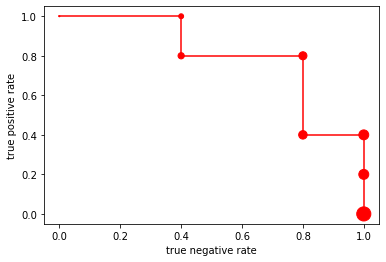

In [19]:
# TNR = 1 - FPR
plt.plot(1.0 - fpr, tpr, color='red')
plt.scatter(1.0 - fpr, tpr, color='red', s=threshold * 100)

plt.xlabel('true negative rate')
plt.ylabel('true positive rate')
plt.show()

Calculamos el área bajo la curva con [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html):

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred_proba)

0.8

## Curvas PR (Precision/Recall)

Usamos [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) para obtener los puntos y graficamos:

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_true, y_pred_proba)

# Se agrega un umbral trivial que se omite en sklearn
threshold = np.append(threshold, 1)

for p, r, th in zip(precision, recall, threshold):
    print(f'Pr {p:0.2f}, Re {r}, Thr {th}')

Pr 0.62, Re 1.0, Thr 0.24
Pr 0.57, Re 0.8, Thr 0.39
Pr 0.67, Re 0.8, Thr 0.51
Pr 0.80, Re 0.8, Thr 0.65
Pr 0.75, Re 0.6, Thr 0.7
Pr 0.67, Re 0.4, Thr 0.72
Pr 1.00, Re 0.4, Thr 0.98
Pr 1.00, Re 0.2, Thr 0.99
Pr 1.00, Re 0.0, Thr 1.0


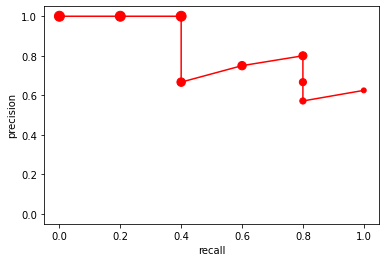

In [22]:
# Límites para los ejes
borde = 0.05
plt.xlim(0 - borde, 1 + borde)
plt.ylim(0 - borde, 1 + borde)

plt.plot(recall, precision, color='red')
plt.scatter(recall, precision, color='red', s=threshold * 100)

plt.xlabel('recall')
plt.ylabel('precision')
plt.show()